In [1]:
import numpy as np
import sympy as sp
from scipy.optimize import root
import matplotlib.pyplot as plt

# Determination of Crack Tip Stress Field
In order to calculate crack tip stress field, an infinite stress field under uniform compressive load is assumed. The location of crack is supposed to be at the center having a length of $2a$. The angle of inclination of this crack to the direction of applied load is considered to be $\beta$ as described in figure below. the figure shows a far field stress condition where $\sigma_y$ is normal to the crack, $\sigma_x$ is parallel and $\tau_{xy}$ denotes the shear stress. These stresses are written as:
\begin{gather*}
\sigma_y= - \sigma sin^2\beta    \\
\sigma_x= - \sigma cos^2\beta    \\
\tau_{xy}= - \sigma sin\beta cos\beta  
\end{gather*}
Here, $\sigma > 0$ for compressive stresses.  

<img src="mixedmodecriterion.png" width="500"/>

In [2]:
sigma = sp.Symbol(r'\sigma', nonnegative = True)
beta = sp.Symbol(r'\beta', nonnegative = True)
rho = sp.Symbol(r'\rho', nonnegative = True)
a = sp.Symbol('a', nonnegative = True)
theta = sp.Symbol(r'\theta', nonnegative = True)
r = sp.Symbol('r', nonnegative = True) #Distance from the crack tip
E = sp.Symbol('E', nonnegative = True)
nu = sp.Symbol('r\nu', nonnegative = True)
mu = sp.Symbol('r\mu', nonnegative = True)
K_I = sp.Symbol('K_I', real = True)
K_II = sp.Symbol('K_{II}', real = True)

In [3]:
sig_y = - sigma * (sp.sin(beta))**2
sig_x = - sigma * (sp.cos(beta))**2
tau_xy = - sigma * sp.sin(beta) * sp.cos(beta)
tau_xy;

## Kink Initiation Direction
The direction of initiation of a kink crack can be attained from the given stress Intensity factors at tip of the notch. Moreover, the theories involved in evaluating the direction are:
1. Maximum Stress Criteria
2. Energy Release Rate Theory
3. Kink Initiation Stress

### Maximum Stress Criteria
The theory states that the crack propagates in the radial direction. This direction of crack elongation is dependent on the maximum tangential stress and lies normal to the MTS $\sigma_{\theta}$. The simplified equation taken from the Erdogan an Sih concept are:
\begin{align}
\sigma_{\theta} = \frac{cos\frac{\theta}{2}}{\sqrt{2\pi r}}\left(K_I\cos^2\frac{\theta}{2} - \frac{3}{2} K_{II} \sin \theta \right) - \sigma \cos^2 \beta \sin^2 \beta   \\
\end{align}
This equation contains an additional term at the end which is taken from William's analysis and represents the crack tip curvature. Therefore, the direction of crack propagation is given as follows:
\begin{gather*}
\frac{\partial \sigma_{\theta}}{\partial \theta} = 0   \\
\end{gather*}
From Shah's paper, the value for $\rho = 1 mm$ and $a = 25.4 mm$ which would yield $\frac{\rho}{a} = 0.039$.  The mode I SIF in direction of crack propagation angle $\theta$ in terms of Maximum stress criteria is:
\begin{align}
K_I(\theta) = \sigma_{\theta} \sqrt{2 \pi r} 
\end{align}

The enlargement of crack tip in the figure shows that $\sigma_x$ represents the stress at the crack tip. Assuming that the tip of the crack has a sharp edge than $\sigma_x$ will be neglected and the SIFs $K_I$ and $K_{II}$ are expressed as given:
\begin{gather*}
K_I = - \sigma \sqrt{\pi a}\sin^2 \beta  \\
K_{II} = - \sigma \sqrt{\pi a}\sin\beta \cos\beta  
\end{gather*}
The negative value of $K_I$ represents the closure of the crack whereas the negative value of $K_{II}$ depicts that shear stress lies in the opposite direction.

In [53]:
sig_the = sp.cos((theta/2)) / sp.sqrt(2*sp.pi*r) *(K_I *(sp.cos((theta/2)))**2 - sp.Rational(3,2) * K_II * sp.sin(theta)) #-  \
            #(sigma * (sp.cos(beta))**2 * (sp.sin(theta))**2)
sig_the

sqrt(2)*(K_I*cos(\theta/2)**2 - 3*K_{II}*sin(\theta)/2)*cos(\theta/2)/(2*sqrt(pi)*sqrt(r))

In [58]:
diff_sig_the = sig_the.diff(theta)
diff_sig_the2 = sp.simplify(diff_sig_the)
diff_sig_the2

-3*sqrt(2)*(2*K_I*sin(\theta/2)*cos(\theta/2)**2 - K_{II}*sin(\theta/2)*sin(\theta) + 2*K_{II}*cos(\theta/2)*cos(\theta))/(8*sqrt(pi)*sqrt(r))

In [62]:
diff_sig_the3= sp.trigsimp(diff_sig_the)

In [66]:
diff_sig_the4 = sp.expand_trig(diff_sig_the)
diff_sig_the4

-sqrt(2)*(K_I*cos(\theta/2)**2 - 3*K_{II}*sin(\theta)/2)*sin(\theta/2)/(4*sqrt(pi)*sqrt(r)) + sqrt(2)*(-K_I*sin(\theta/2)*cos(\theta/2) - 3*K_{II}*cos(\theta)/2)*cos(\theta/2)/(2*sqrt(pi)*sqrt(r))

In [67]:
params = {sigma : 1.14, r : 38.1, a : 25.4}

In [7]:
b = sp.trigsimp(diff_sig_the.subs(params)) 
g = sp.collect(b, theta)
g

sqrt(2)*(0.0151882867736328*K_I*cos(2*\theta) - 0.0151882867736328*K_I + 0.0303765735472657*K_{II}*sin(\theta) - 0.0455648603208985*K_{II}*sin(2*\theta))/(sqrt(pi)*sin(\theta/2))

In [8]:
#a = sp.simplify(sp.expand_trig(diff_sig_the))
#a

In [ ]:
#sol = sp.solve(diff_sig_the.subs(params), theta)
sol = sp.solve(diff_sig_the4.subs(params), theta)
sol[1]

In [10]:
K_I_ = - sigma * sp.sqrt(np.pi * a) * (sp.sin(beta))**2
K_II_ = - sigma * sp.sqrt(np.pi * a) * sp.sin(beta) * sp.cos(beta)
K_II_

-1.77245385090552*\sigma*sqrt(a)*sin(\beta)*cos(\beta)

In [11]:
sol_subs = sol[1].subs(list(zip([K_I, K_II], [K_I_, K_II_])))
sol_subs

-I*log(0.5*(-538410747611657.0*I*\sigma*sqrt(a)*sin(\beta)*cos(\beta) - 1.52285556279968e+15*sqrt(0.124999999999999*\sigma**2*a*sin(\beta)**4 + \sigma**2*a*sin(\beta)**2*cos(\beta)**2))/(-269205373805828.0*\sigma*sqrt(a)*sin(\beta)**2 - 807616121417485.0*I*\sigma*sqrt(a)*sin(\beta)*cos(\beta)))

In [12]:
get_sig_the = sp.lambdify((beta), sol_subs.subs(params), 'numpy')
sol_subs.subs(params)

-I*log(0.5*(-8.74944335294247e+15*sqrt(0.124999999999999*sin(\beta)**4 + sin(\beta)**2*cos(\beta)**2) - 3.0933953632366e+15*I*sin(\beta)*cos(\beta))/(-1.54669768161829e+15*sin(\beta)**2 - 4.64009304485489e+15*I*sin(\beta)*cos(\beta)))

In [13]:
def get_response(beta=90*np.pi/180, n_steps=8): #,n_steps=4
    theta_rec = [] 
    beta_o = np.linspace(15*np.pi/180,beta,n_steps+1)
    for be in beta_o:
        theta = get_sig_the(be)
        theta_rec.append(theta)
        #print(theta*180/np.pi)
        #print(be)
    return (
        beta_o, np.array(theta_rec,dtype=np.float_)
    )

C:\Users\Fahad\anaconda3\lib\site-packages\ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


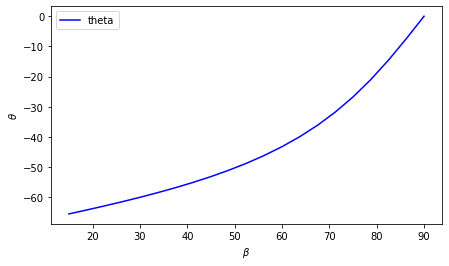

In [14]:
import matplotlib.pyplot as plt
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
colors = ['blue','red', 'green', 'black', 'magenta', 'pink']
n_step_range = np.arange(1,2)*20
beta = 90*np.pi/180
for n_step, color in zip(n_step_range, colors):
    beta_o, theta_arr = get_response(beta,n_step) 
    ax1.plot(beta_o*180/np.pi, theta_arr[:]*180/np.pi, color=color, 
         label='theta')
    ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel(r'$\theta$')
    ax1.legend()

When the crack tip possess a finite curvature $\rho$, it is observed that $\sigma_x$ would produce tensile stresses close to the crack tip. Hence, 
\begin{align}
\sigma_{max} = {\lVert}{\sigma_x}{\rVert}  
\end{align}
For this case, SIF will be written as:
\begin{gather*}
K_I = \sigma \sqrt{\pi a}\left(\frac{1}{2}\sqrt{\frac{\rho}{a} }\cos^2 \beta - \sin^2 \beta \right)  \\
K_{II} = - \sigma \sqrt{\pi a}\sin\beta \cos\beta  
\end{gather*}

In [15]:
K_I_rho = sigma * sp.sqrt(np.pi * a) * (1/2 * sp.sqrt(rho / a) * (sp.cos(beta))**2 - (sp.sin(beta))**2)  
K_I_rho;

### The Energy Release Rate Theory
Hussain et al. used this theroy to find the energ release rate $G$. It calculates $G$ at the crack which moves from the main crack in direction of $\theta$.
1. The direction of the crack propagation is the one in which the maximum energy release rate occurs.
2. the propagation of the crack starts when energy release rate reaches a limit value. 

It is given by:
\begin{align}
G(\theta) = \frac{4}{E} \frac{1}{(3 + cos^2\theta)^2} \left(\frac{1 + \frac{\theta}{\pi}}{1 - \frac{\theta}{\pi}}\right)^\frac{-\theta}{\pi}((1 + 3 cos^2\theta)K_I^2 - 8 K_I K_{II} sin\theta cos\theta + (9 - 5 cos^2\theta)K_{II}^2) 
\end{align}
Here, $\theta$ is obtained by the following condition:
\begin{gather*}
\frac{\partial G}{\partial \theta} = 0  
\end{gather*}

In [16]:
G_the = (4/E) * (1/(3 + (sp.cos(theta))**2)) * ((1 + (theta/sp.pi))/(1 - (theta/sp.pi)))**(- theta/sp.pi) * \
((1 + 3 * (sp.cos(theta))**2)* K_I**2 - 8*K_I*K_II*sp.sin(theta)*sp.cos(theta) + (9 - 5 * (sp.cos(theta))**2)*K_II**2)
G_the

4*((\theta/pi + 1)/(-\theta/pi + 1))**(-\theta/pi)*(K_I**2*(3*cos(\theta)**2 + 1) - 8*K_I*K_{II}*sin(\theta)*cos(\theta) + K_{II}**2*(9 - 5*cos(\theta)**2))/(E*(cos(\theta)**2 + 3))

In [17]:
G_d_the = G_the.diff(theta)
G_d_the

4*((\theta/pi + 1)/(-\theta/pi + 1))**(-\theta/pi)*(-\theta*(-\theta/pi + 1)*(1/(pi*(-\theta/pi + 1)) + (\theta/pi + 1)/(pi*(-\theta/pi + 1)**2))/(pi*(\theta/pi + 1)) - log((\theta/pi + 1)/(-\theta/pi + 1))/pi)*(K_I**2*(3*cos(\theta)**2 + 1) - 8*K_I*K_{II}*sin(\theta)*cos(\theta) + K_{II}**2*(9 - 5*cos(\theta)**2))/(E*(cos(\theta)**2 + 3)) + 4*((\theta/pi + 1)/(-\theta/pi + 1))**(-\theta/pi)*(-6*K_I**2*sin(\theta)*cos(\theta) + 8*K_I*K_{II}*sin(\theta)**2 - 8*K_I*K_{II}*cos(\theta)**2 + 10*K_{II}**2*sin(\theta)*cos(\theta))/(E*(cos(\theta)**2 + 3)) + 8*((\theta/pi + 1)/(-\theta/pi + 1))**(-\theta/pi)*(K_I**2*(3*cos(\theta)**2 + 1) - 8*K_I*K_{II}*sin(\theta)*cos(\theta) + K_{II}**2*(9 - 5*cos(\theta)**2))*sin(\theta)*cos(\theta)/(E*(cos(\theta)**2 + 3)**2)

In [18]:
params_ = {E: 20000}

In [19]:
b = sp.trigsimp(G_d_the.subs(params_)) 
g_ = sp.collect(b, theta)
g_

((\theta/pi + 1)/(-\theta/pi + 1))**(-\theta/pi)*(-\theta*(-\theta/pi + 1)*(1/(pi*(-\theta/pi + 1)) + (\theta/pi + 1)/(pi*(-\theta/pi + 1)**2))/(pi*(\theta/pi + 1)) - log((\theta/pi + 1)/(-\theta/pi + 1))/pi)*(K_I**2*(3*cos(\theta)**2 + 1) - 4*K_I*K_{II}*sin(2*\theta) + K_{II}**2*(9 - 5*cos(\theta)**2))/(5000*(cos(\theta)**2 + 3)) + ((\theta/pi + 1)/(-\theta/pi + 1))**(-\theta/pi)*(-3*K_I**2*sin(2*\theta) - 8*K_I*K_{II}*cos(2*\theta) + 5*K_{II}**2*sin(2*\theta))/(5000*(cos(\theta)**2 + 3)) + ((\theta/pi + 1)/(-\theta/pi + 1))**(-\theta/pi)*(K_I**2*(3*cos(\theta)**2 + 1) - 4*K_I*K_{II}*sin(2*\theta) + K_{II}**2*(9 - 5*cos(\theta)**2))*sin(\theta)*cos(\theta)/(2500*(cos(\theta)**2 + 3)**2)

In [20]:
sol_er = sp.solveset(g_, theta, sp.S.Reals)
sol_er

Complement(ConditionSet(\theta, Eq(pi*(pi - \theta)*(\theta + pi)*(cos(\theta)**2 + 3)*(-3*K_I**2*sin(2*\theta) - 8*K_I*K_{II}*cos(2*\theta) + 5*K_{II}**2*sin(2*\theta)) + 2*pi*(pi - \theta)*(\theta + pi)*(K_I**2*(3*cos(\theta)**2 + 1) - 4*K_I*K_{II}*sin(2*\theta) + K_{II}**2*(9 - 5*cos(\theta)**2))*sin(\theta)*cos(\theta) + (-2*pi*\theta - (pi - \theta)*(\theta + pi)*log((\theta + pi)/(pi - \theta)))*(cos(\theta)**2 + 3)*(K_I**2*(3*cos(\theta)**2 + 1) - 4*K_I*K_{II}*sin(2*\theta) + K_{II}**2*(9 - 5*cos(\theta)**2)), 0), Reals), ConditionSet(\theta, Eq(((\theta + pi)/(pi - \theta))**(\theta/pi)*(pi - \theta)*(\theta + pi)*(cos(\theta)**2 + 3)**2, 0), Reals))

In [21]:
beta = sp.Symbol(r'\beta', real = True)
K_I_ = - sigma * sp.sqrt(np.pi * a) * (sp.sin(beta))**2
K_II_ = - sigma * sp.sqrt(np.pi * a) * sp.sin(beta) * sp.cos(beta)
K_II_

-1.77245385090552*\sigma*sqrt(a)*sin(\beta)*cos(\beta)

In [22]:
sol_subs_er = sol_er.subs(list(zip([K_I, K_II], [K_I_, K_II_])))
sol_subs_er

Complement(ConditionSet(\theta, Eq(pi*(pi - \theta)*(\theta + pi)*(cos(\theta)**2 + 3)*(-9.42477796076938*\sigma**2*a*sin(\beta)**4*sin(2*\theta) - 25.1327412287183*\sigma**2*a*sin(\beta)**3*cos(\beta)*cos(2*\theta) + 15.707963267949*\sigma**2*a*sin(\beta)**2*sin(2*\theta)*cos(\beta)**2) + 2*pi*(pi - \theta)*(\theta + pi)*(3.14159265358979*\sigma**2*a*(9 - 5*cos(\theta)**2)*sin(\beta)**2*cos(\beta)**2 + 3.14159265358979*\sigma**2*a*(3*cos(\theta)**2 + 1)*sin(\beta)**4 - 12.5663706143592*\sigma**2*a*sin(\beta)**3*sin(2*\theta)*cos(\beta))*sin(\theta)*cos(\theta) + (-2*pi*\theta - (pi - \theta)*(\theta + pi)*log((\theta + pi)/(pi - \theta)))*(cos(\theta)**2 + 3)*(3.14159265358979*\sigma**2*a*(9 - 5*cos(\theta)**2)*sin(\beta)**2*cos(\beta)**2 + 3.14159265358979*\sigma**2*a*(3*cos(\theta)**2 + 1)*sin(\beta)**4 - 12.5663706143592*\sigma**2*a*sin(\beta)**3*sin(2*\theta)*cos(\beta)), 0), Reals), ConditionSet(\theta, Eq(((\theta + pi)/(pi - \theta))**(\theta/pi)*(pi - \theta)*(\theta + pi)*(co

In [23]:
get_sig_the = sp.lambdify((beta, theta), sol_subs_er.subs(params), 'numpy')
sol_subs_er.subs(params)

Complement(ConditionSet(\theta, Eq(pi*(pi - \theta)*(\theta + pi)*(cos(\theta)**2 + 3)*(-311.110412520523*sin(\beta)**4*sin(2*\theta) - 829.627766721396*sin(\beta)**3*cos(\beta)*cos(2*\theta) + 518.517354200872*sin(\beta)**2*sin(2*\theta)*cos(\beta)**2) + 2*pi*(pi - \theta)*(\theta + pi)*(103.703470840174*(9 - 5*cos(\theta)**2)*sin(\beta)**2*cos(\beta)**2 + 103.703470840174*(3*cos(\theta)**2 + 1)*sin(\beta)**4 - 414.813883360698*sin(\beta)**3*sin(2*\theta)*cos(\beta))*sin(\theta)*cos(\theta) + (-2*pi*\theta - (pi - \theta)*(\theta + pi)*log((\theta + pi)/(pi - \theta)))*(cos(\theta)**2 + 3)*(103.703470840174*(9 - 5*cos(\theta)**2)*sin(\beta)**2*cos(\beta)**2 + 103.703470840174*(3*cos(\theta)**2 + 1)*sin(\beta)**4 - 414.813883360698*sin(\beta)**3*sin(2*\theta)*cos(\beta)), 0), Reals), ConditionSet(\theta, Eq(((\theta + pi)/(pi - \theta))**(\theta/pi)*(pi - \theta)*(\theta + pi)*(cos(\theta)**2 + 3)**2, 0), Reals))

### Strain Energy Density
The strain energy density can be written as:
\begin{align}
S(\theta) = a_{11}K_I^2 + 2 a_{12}K_I K_{II} + a_{22}K_{II}^2
\end{align}
where:
\begin{gather*}
a_{11} = \frac{(\kappa - cos\theta)(1 + cos\theta)}{16 \pi \mu} \\
a_{12} = \frac{(2 cos\theta - \kappa + 1)}{16 \pi \mu} \\
a_{22} = \frac{(\kappa + 1)(1 - cos\theta) + (1 + cos\theta)(3 cos\theta -1)}{16 \pi \mu}
\end{gather*}
and:
\begin{gather*}
\kappa = 3 - 4 \nu \\
\mu = E(2(1+\nu)) \\
\end{gather*}

In [24]:
#mu = E * (2 * (1 + nu))
#kappa = 3 - 4 * nu
kappa = sp.Symbol(r'\kappa', real = True)
mu = sp.Symbol(r'\mu', real = True)
a_11 = ((kappa - sp.cos(theta))*(1 + sp.cos(theta))) / (16 * sp.pi * mu)
a_12 = ((2 * sp.cos(theta) - kappa + 1) * sp.sin(theta)) / (16 * sp.pi * mu)
a_22 = ((kappa + 1) * (1 - sp.cos(theta)) + (1 + sp.cos(theta))*(3 * sp.cos(theta) - 1)) / (16 * sp.pi * mu)
S_the = a_11 * K_I**2 + 2 * a_12 * K_I * K_II + a_22 * K_II**2
S_the

K_I**2*(\kappa - cos(\theta))*(cos(\theta) + 1)/(16*pi*\mu) + K_I*K_{II}*(-\kappa + 2*cos(\theta) + 1)*sin(\theta)/(8*pi*\mu) + K_{II}**2*((1 - cos(\theta))*(\kappa + 1) + (cos(\theta) + 1)*(3*cos(\theta) - 1))/(16*pi*\mu)

The crack initiation angle direction can be obtained as follows:
\begin{gather*}
\frac{\partial S}{\partial \theta} = 0   
\end{gather*}

In [25]:
diff_S_the = S_the.diff(theta)
diff_S_the

-K_I**2*(\kappa - cos(\theta))*sin(\theta)/(16*pi*\mu) + K_I**2*(cos(\theta) + 1)*sin(\theta)/(16*pi*\mu) + K_I*K_{II}*(-\kappa + 2*cos(\theta) + 1)*cos(\theta)/(8*pi*\mu) - K_I*K_{II}*sin(\theta)**2/(4*pi*\mu) + K_{II}**2*((\kappa + 1)*sin(\theta) - 3*(cos(\theta) + 1)*sin(\theta) - (3*cos(\theta) - 1)*sin(\theta))/(16*pi*\mu)

In [26]:
mat_params = {kappa: 0.2, mu: 0.2}

In [38]:
b = sp.trigsimp(diff_S_the.subs(mat_params)) 
s_ = sp.collect(b, K_I)
ss = sp.collect(s_,K_II)
se = sp.expand_trig(ss)
st = sp.collect(se, theta)
st

(K_I**2*(0.625*sin(\theta)*cos(\theta) + 0.25*sin(\theta)) + K_I*K_{II}*(2.5*cos(\theta)**2 + 0.5*cos(\theta) - 1.25) + K_{II}**2*(-1.875*sin(\theta)*cos(\theta) - 0.25*sin(\theta)))/pi

In [45]:
from sympy.solvers.solveset import solvify, nonlinsolve
theta_val_S = nonlinsolve([st], [theta])
theta_val_S

FiniteSet((ConditionSet(\theta, Eq(K_I**2*(0.625*cos(\theta) + 0.25)*sin(\theta) + K_I*K_{II}*(0.5*cos(\theta) + 1.25*cos(2*\theta)) - K_{II}**2*(1.875*cos(\theta) + 0.25)*sin(\theta), 0), Reals),))

In [46]:
#mu = E * (2 * (1 + nu))
#kappa = 3 - 4 * nu

In [48]:
beta = sp.Symbol(r'\beta', real = True)
K_I_ = - sigma * sp.sqrt(np.pi * a) * (sp.sin(beta))**2
K_II_ = - sigma * sp.sqrt(np.pi * a) * sp.sin(beta) * sp.cos(beta)
K_II_

-1.77245385090552*\sigma*sqrt(a)*sin(\beta)*cos(\beta)

In [49]:
sol_subs_se = theta_val_S.subs(list(zip([K_I, K_II], [K_I_, K_II_])))
sol_subs_se

FiniteSet((ConditionSet(\theta, Eq(3.14159265358979*\sigma**2*a*(0.5*cos(\theta) + 1.25*cos(2*\theta))*sin(\beta)**3*cos(\beta) + 3.14159265358979*\sigma**2*a*(0.625*cos(\theta) + 0.25)*sin(\beta)**4*sin(\theta) - 3.14159265358979*\sigma**2*a*(1.875*cos(\theta) + 0.25)*sin(\beta)**2*sin(\theta)*cos(\beta)**2, 0), Reals),))

In [50]:
params_ = {sigma:1, a:1}

In [52]:
get_S_the = sp.lambdify((beta, theta), sol_subs_se.subs(params_), 'numpy')
sol_subs_se.subs(params_)

FiniteSet((ConditionSet(\theta, Eq(3.14159265358979*(0.5*cos(\theta) + 1.25*cos(2*\theta))*sin(\beta)**3*cos(\beta) + 3.14159265358979*(0.625*cos(\theta) + 0.25)*sin(\beta)**4*sin(\theta) - 3.14159265358979*(1.875*cos(\theta) + 0.25)*sin(\beta)**2*sin(\theta)*cos(\beta)**2, 0), Reals),))